## **Importing Necessary packages**

In [3]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **LOADING THE DATASET**

In [4]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


## **Checking the Loaded dataset**

In [5]:
print('Total number of Images in the Dataset:', len(x_train) + len(x_test))
print('Number of train images:', len(x_train))
print('Number of test images:', len(x_test))
print('Shape of training dataset:',x_train.shape)
print('Shape of testing dataset:',x_test.shape)

Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


## **Normalizing the pixel values between 0 and 1**

In [6]:
x_train, x_test = x_train/255.0, x_test/255.0

In [7]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [8]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

## **Reshaping**

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]  ## y_train is 2D array, which is actually not required and we can work with 1D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)  ## reshaping the y_train

In [12]:
y_train[:5]  ## we can see that the integer values that is present in y_train is representing the class_names

array([6, 9, 9, 4, 1], dtype=uint8)

## **OBSERVING THE DATASET**

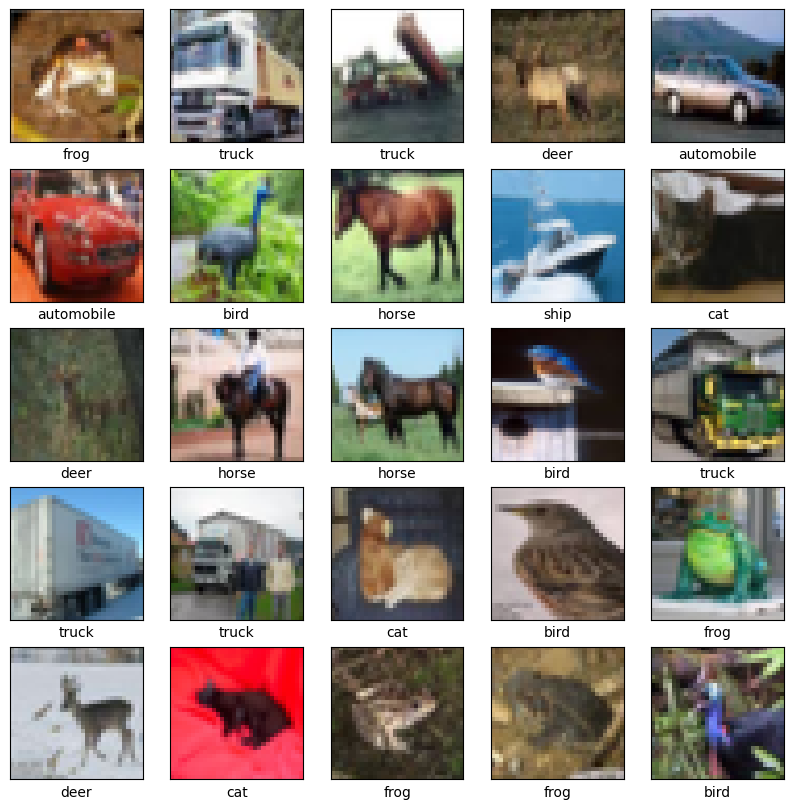

In [13]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])

## **Doing Train Test Split on Training data initially loaded**

In [14]:
from sklearn.model_selection import train_test_split
x_training, x_testing, y_training, y_testing = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [15]:
print(x_train.shape, x_training.shape, x_testing.shape)   ## Checking the shapes of train and test data

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


## **Building the Basic Neural Network**

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [17]:
basic_model = Sequential()
basic_model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
basic_model.add(MaxPooling2D((2,2)))
basic_model.add(Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)))
basic_model.add(MaxPooling2D((2,2)))
basic_model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
basic_model.add(Flatten())
basic_model.add(Dense(64, activation='relu'))
basic_model.add(Dense(10, activation='softmax'))

In [18]:
#Description about parameters and layers
basic_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          73792     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## **Compiling and training the basic model**

In [19]:
basic_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

basic_model.fit(x_training,y_training, validation_split=0.1, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1125/1125 [==============================] - 13s 4ms/step - loss: 1.6343 - accuracy: 0.3982 - val_loss: 1.3866 - val_accuracy: 0.4942
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.2664 - accuracy: 0.5500 - val_loss: 1.2607 - val_accuracy: 0.5480
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.1008 - accuracy: 0.6108 - val_loss: 1.0877 - val_accuracy: 0.6155
Epoch 4/10
1125/1125 [==============================] - 4s 4ms/step - loss: 0.9954 - accuracy: 0.6480 - val_loss: 1.0503 - val_accuracy: 0.6242
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 0.9150 - accuracy: 0.6800 - val_loss: 0.9640 - val_accuracy: 0.6557
Epoch 6/10
1125/1125 [==============================] - 5s 4ms/step - loss: 0.8515 - accuracy: 0.7009 - val_loss: 0.9530 - val_accuracy: 0.6645
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 0.7917 - accuracy: 0.7220 - val_loss: 0.9248 - val_accuracy: 0.6787
Ep

## **Testing the basic model**

In [20]:
basic_model_loss, basic_model_accuracy = basic_model.evaluate(x_testing, y_testing)
print('Test Accuracy of Basic model =', basic_model_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.9073 - accuracy: 0.7021
Test Accuracy of Basic model = 0.7020999789237976


## **Using pre-trained ResNet50 model**

In [21]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [22]:
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
resnet50_model.summary()

## include_top: means we are importing the whole model(ResNet50 here) expect its output
## layer, because the imagenet dataset has thousands of classes but we have
## only 10 classes to predict.

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [23]:
total_classes = 10

r50_model = models.Sequential()

## scaling the input images to 256*256 as ResNet50 model takes input of size 256*256
r50_model.add(layers.UpSampling2D((2,2)))
r50_model.add(layers.UpSampling2D((2,2)))
r50_model.add(layers.UpSampling2D((2,2)))

## adding our model
r50_model.add(resnet50_model)
r50_model.add(Flatten())
r50_model.add(BatchNormalization())   ## used to normalize the data
r50_model.add(Dense(128, activation='relu'))
r50_model.add(Dropout(0.5))   ## Dropout() is used to reduce the risk of overfitting
r50_model.add(BatchNormalization())
r50_model.add(Dense(64, activation='relu'))
r50_model.add(Dropout(0.5))
r50_model.add(BatchNormalization())
r50_model.add(Dense(total_classes, activation='softmax'))

## **Compiling the ResNet50 Model**

In [24]:
r50_model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

## **Training the ResNet50 Model**

In [25]:
history = r50_model.fit(x_training, y_training, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 263s 206ms/step - loss: 1.7214 - acc: 0.4282 - val_loss: 0.9281 - val_acc: 0.7588
Epoch 2/10
1125/1125 [==============================] - 231s 205ms/step - loss: 1.0384 - acc: 0.6875 - val_loss: 0.4946 - val_acc: 0.8798
Epoch 3/10
1125/1125 [==============================] - 231s 206ms/step - loss: 0.7595 - acc: 0.7987 - val_loss: 0.3652 - val_acc: 0.9140
Epoch 4/10
1125/1125 [==============================] - 231s 205ms/step - loss: 0.5888 - acc: 0.8599 - val_loss: 0.3185 - val_acc: 0.9245
Epoch 5/10
1125/1125 [==============================] - 231s 205ms/step - loss: 0.4604 - acc: 0.8996 - val_loss: 0.2734 - val_acc: 0.9308
Epoch 6/10
1125/1125 [==============================] - 231s 205ms/step - loss: 0.3620 - acc: 0.9308 - val_loss: 0.2658 - val_acc: 0.9350
Epoch 7/10
1125/1125 [==============================] - 231s 206ms/step - loss: 0.2937 - acc: 0.9484 - val_loss: 0.2358 - val_acc: 0.9370
Epoch 8/10
1125/1125 [============

## **Testing the ResNet50 Model**

In [26]:
resnet50_model_loss, resnet50_model_accuracy = r50_model.evaluate(x_testing, y_testing)
print('Test Accuracy of ResNet50 model =', resnet50_model_accuracy)

313/313 [==============================] - 23s 68ms/step - loss: 0.2168 - acc: 0.9418
Test Accuracy of ResNet50 model = 0.9417999982833862


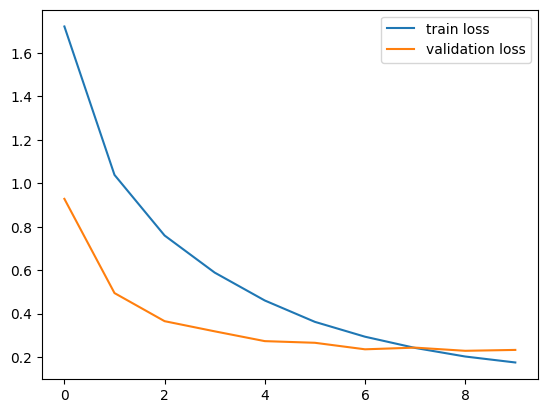

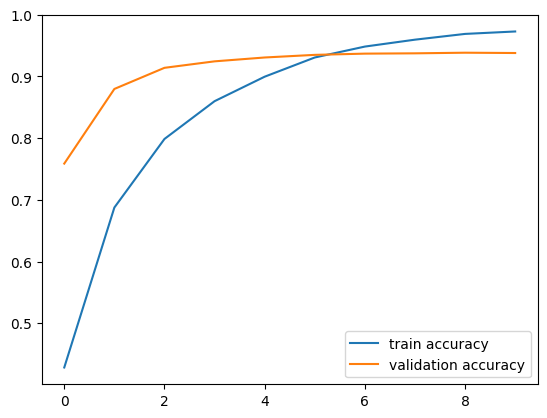

In [27]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

## **Using pre-trained ResNet101 Model**

In [28]:
from tensorflow.keras.applications.resnet import ResNet101

In [29]:
resnet101_model = ResNet101(weights='imagenet', include_top=False, input_shape=(256,256,3))
resnet101_model.summary()

171446536/171446536 [==============================] - 6s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                   

In [30]:
no_of_classes = 10

r101_model = models.Sequential()

## scaling the input images to 256*256 as ResNet101 model takes input of size 256*256
r101_model.add(layers.UpSampling2D((2,2)))
r101_model.add(layers.UpSampling2D((2,2)))
r101_model.add(layers.UpSampling2D((2,2)))

## adding our model
r101_model.add(resnet101_model)
r101_model.add(Flatten())
r101_model.add(BatchNormalization())   ## used to normalize the data
r101_model.add(Dense(128, activation='relu'))
r101_model.add(Dropout(0.5))   ## Dropout() is used to reduce the risk of overfitting
r101_model.add(BatchNormalization())
r101_model.add(Dense(64, activation='relu'))
r101_model.add(Dropout(0.5))
r101_model.add(BatchNormalization())
r101_model.add(Dense(no_of_classes, activation='softmax'))

## **Compiling the ResNet101 Model**

In [31]:
r101_model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

## **Training the ResNet101 Model**

In [32]:
history_resnet101 = r101_model.fit(x_training, y_training, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 443s 343ms/step - loss: 1.6016 - acc: 0.4699 - val_loss: 0.9162 - val_acc: 0.7548
Epoch 2/10
1125/1125 [==============================] - 384s 341ms/step - loss: 0.9069 - acc: 0.7499 - val_loss: 0.4398 - val_acc: 0.9053
Epoch 3/10
1125/1125 [==============================] - 384s 341ms/step - loss: 0.6537 - acc: 0.8472 - val_loss: 0.3351 - val_acc: 0.9208
Epoch 4/10
1125/1125 [==============================] - 383s 341ms/step - loss: 0.4909 - acc: 0.9036 - val_loss: 0.2681 - val_acc: 0.9380
Epoch 5/10
1125/1125 [==============================] - 384s 341ms/step - loss: 0.3789 - acc: 0.9323 - val_loss: 0.2415 - val_acc: 0.9395
Epoch 6/10
1125/1125 [==============================] - 384s 341ms/step - loss: 0.3038 - acc: 0.9521 - val_loss: 0.2456 - val_acc: 0.9365
Epoch 7/10
1125/1125 [==============================] - 384s 341ms/step - loss: 0.2454 - acc: 0.9651 - val_loss: 0.2264 - val_acc: 0.9440
Epoch 8/10
1125/1125 [============

## **Testing the ResNet101 Model**

In [33]:
resnet101_model_loss, resnet101_model_accuracy = r101_model.evaluate(x_testing, y_testing)
print('Test Accuracy of ResNet101 model =', resnet101_model_accuracy)

313/313 [==============================] - 38s 110ms/step - loss: 0.2214 - acc: 0.9433
Test Accuracy of ResNet101 model = 0.9433000087738037


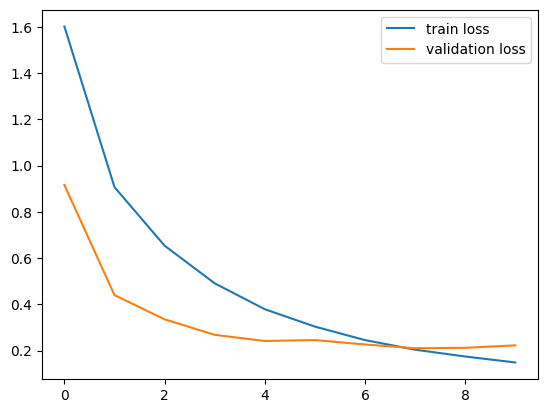

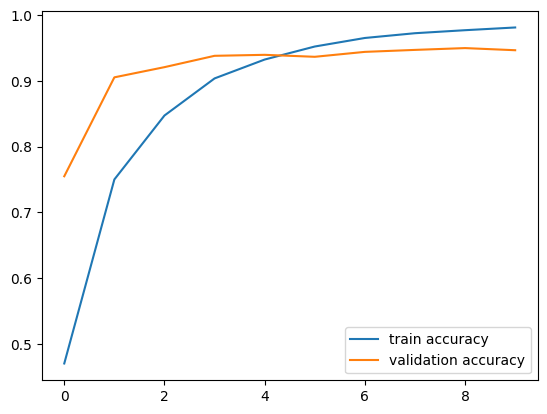

In [34]:
h2 = history_resnet101

# plot the loss value
plt.plot(h2.history['loss'], label='train loss')
plt.plot(h2.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h2.history['acc'], label='train accuracy')
plt.plot(h2.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [35]:
r50_model.save('Image_Classification_Model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
